# One Hundred Years of US Baby Names

## Bootcamp Project
### June 30, 2020

### Group
Dhara Bhansali
Sarah Grant
Keke Li
Matt Debnar

### Overview
Analysis of baby names in the US from 1910 thru 2014

In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#data source: https://www.kaggle.com/kaggle/us-baby-names
#import baby name data
baby_name_original = pd.read_csv(
    "Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

Id      Name  Year Gender State Count
0  1      Mary  1910      F    AK    14
1  2     Annie  1910      F    AK    12
2  3      Anna  1910      F    AK    10
3  4  Margaret  1910      F    AK     8
4  5     Helen  1910      F    AK     7

In [3]:
#clean up column formats for Count (float), Year (int), convert year to date in new column date_conv (datetime)
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original["Year"] = baby_name_original["Year"].astype(int)
#alternative: change year into datetime if desired as new column date_conv
#baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [4]:
#look for null values
baby_name_original.isnull().sum()

Id        0
Name      0
Year      0
Gender    0
State     0
Count     0
dtype: int64

In [5]:
#add a new column for Decade
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

Name  Year Gender State  Count  Decade
Id                                                 
1            Mary  1910      F    AK   14.0    1910
2           Annie  1910      F    AK   12.0    1910
3            Anna  1910      F    AK   10.0    1910
4        Margaret  1910      F    AK    8.0    1910
5           Helen  1910      F    AK    7.0    1910
...           ...   ...    ...   ...    ...     ...
5647422      Seth  2014      M    WY    5.0    2010
5647423   Spencer  2014      M    WY    5.0    2010
5647424      Tyce  2014      M    WY    5.0    2010
5647425    Victor  2014      M    WY    5.0    2010
5647426    Waylon  2014      M    WY    5.0    2010

[5647426 rows x 6 columns]

In [6]:
#Define Region by State values
Northeast = ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA')
Midwest = ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD')
South = ('DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'AR', 'OK', 'TX')
West = ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA')


In [7]:
#add column Region and assign based on region-state values
baby_name_new["Region"] = np.where(baby_name_new["State"].isin(Northeast), "Northeast", 
         (np.where(baby_name_new["State"].isin(South), "South",
            (np.where(baby_name_new["State"].isin(West), "West",
                (np.where(baby_name_new["State"].isin(Midwest), "Midwest", "Unknown")))))))

#confirm 4 regions across all data
baby_name_new.nunique()

Name      30274
Year        105
Gender        2
State        51
Count      4944
Decade       11
Region        4
dtype: int64

In [8]:
#find any Unkown regions to bug fix Region States
baby_unknown = baby_name_new.loc[baby_name_new["Region"] == "Unknown", :]
baby_unknown

Empty DataFrame
Columns: [Name, Year, Gender, State, Count, Decade, Region]
Index: []

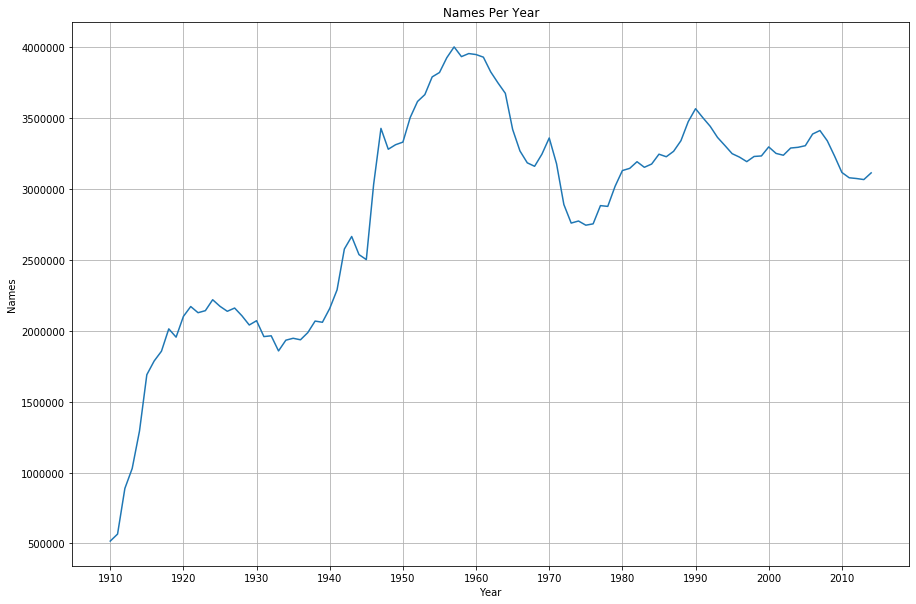

In [9]:
#summarize names per year
years = list(range(1910, 2011, 10))
plt.figure(figsize=(15,10))
plt.plot(baby_name_original.groupby(['Year']).agg({'Count':np.sum}))
plt.title("Names Per Year")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()

plt.savefig(f'Output/Names Per Year.png')

### Observation: the baby boom is real! Count of names jumped at the end of WWII in 1945 and peaked just before 1960

Between 1910 and 2014, the number of names increased over time.

The first sharp incline in baby names occurs in the mid-1940s (from 250,000 to just under 350,000), which correlates to WWII ending in 1945.

These births will mark the beginning of the largest generation in the U.S. (until the millennials), the Baby Boomers. 

The sharp incline continues and peaks in the late-fifties and early sixties (circa 1957 - 1962), the period yielding the greatest volume of names to date -- these names signify the end of the Baby Boomers.


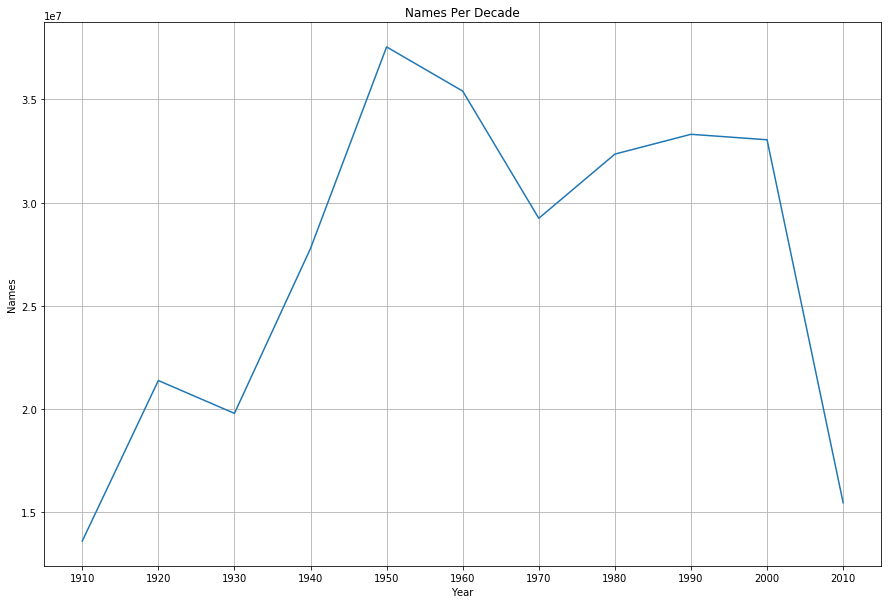

In [10]:
#optional names by Decade
years = list(range(1910, 2011, 10))
plt.figure(figsize=(15,10))
plt.plot(baby_name_new.groupby(['Decade']).agg({'Count':np.sum}))
plt.title("Names Per Decade")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()

plt.savefig(f'Output/Names Per Decade.png')

### Observation: baby boom confirmed in 1950s then slight bounce back until 2000s (note: 2010 is a partial decade, only half thru 2014)

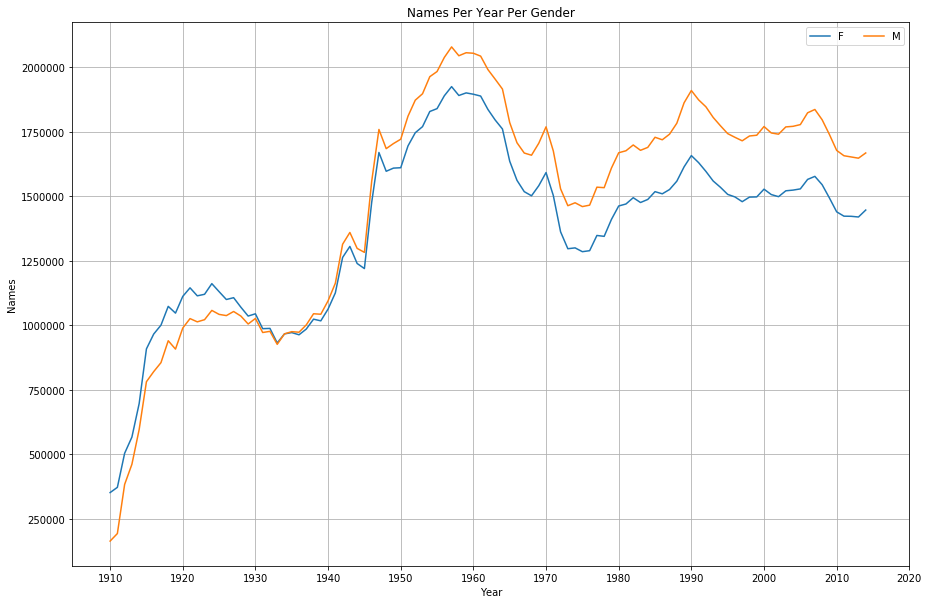

In [11]:
GenderNameGB = baby_name_new.groupby(['Year', 'Gender'])['Count'].sum()
GenderNameGBDF = pd.DataFrame(GenderNameGB)
GenderNameGBDF
GenderNameGBDF.rename(index={0: "Year", 1: "Gender", 2: "Count"})
GenderNameGBDFX = GenderNameGBDF.unstack()
GenderNameGBDFX.columns = GenderNameGBDFX.columns.droplevel()
GenderNameGBDFX
multi_plot = GenderNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Gender")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Gender.png')

### Observation: girls names outpaced boys until 1930; after 1930 the number of boys' names outpaced girls' consistently thru 2014

The trends for male and female baby names are parallel to one another, but in the latter half of the century, they are not equal. 

There are significantly more male baby names beginning in the early 1970s -- a trend that remains the same through 2014. 

One reason for the increase in male baby names is the rising trend in unisex names, many of which are considered “male.” 

For example, the name “Madison” was historically considered a male name, but after the 1984 movie “Splash” (in which the female protagonist names herself Madison after the New York City street), there was a marked rise in U.S. females named Madison. “Madison” was ranked second for girls in the United States by 2001. This rise from obscurity to prominence in only 18 years represents an unprecedented 550,000 percent increase in usage.

The name “Taylor” is another example of this trend of a traditionally male name that has been co-opted as feminine in modern times.


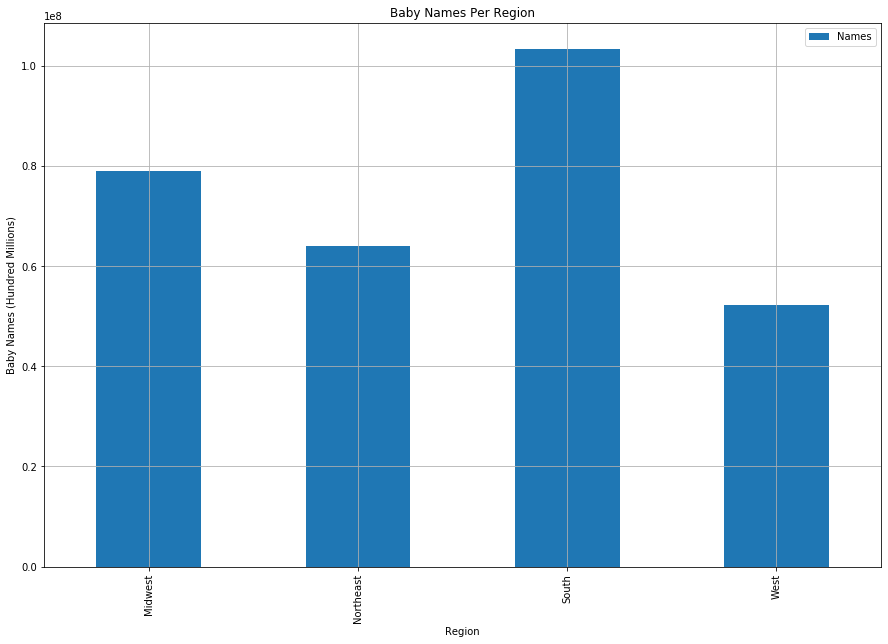

In [12]:
babyRegion = baby_name_new.groupby("Region")

Region = babyRegion.count().index
RegionNames = babyRegion['Count'].sum()

regionSummary = pd.DataFrame({"Region": Region, "Names": RegionNames,
                             })
regionSummary.set_index('Region', inplace=True)

multi_plot = regionSummary.plot(kind="bar", figsize=(15, 10))
plt.title(f"Baby Names Per Region")
plt.grid()
plt.xlabel("Region")
plt.ylabel("Baby Names (Hundred Millions)")
plt.savefig(f'Output/Names Per Region.png')

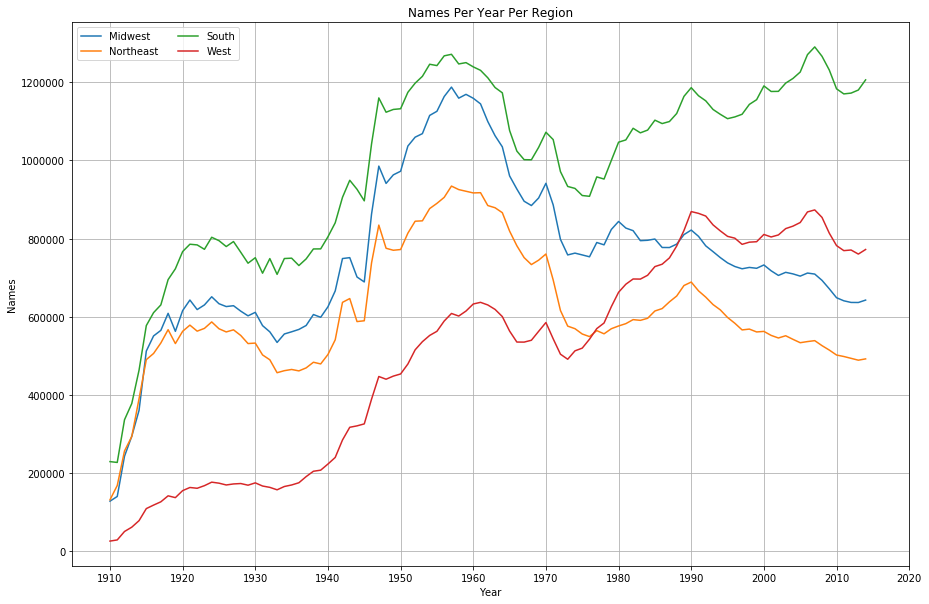

In [13]:
#names per region over time
RegionNameGB = baby_name_new.groupby(['Year', 'Region'])['Count'].sum()
RegionNameGBDF = pd.DataFrame(RegionNameGB)
RegionNameGBDF
RegionNameGBDF.rename(index={0: "Year", 1: "Region", 2: "Count"})
RegionNameGBDFX = RegionNameGBDF.unstack()
RegionNameGBDFX.columns = RegionNameGBDFX.columns.droplevel()
RegionNameGBDFX
multi_plot = RegionNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Region")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Year Per Region.png')

### Observation: the South consitently registers the most names.  The Midwest and and Northeast counts peaked just before 1960 then fell off.  The West gained in name counts starting in 1940 then increased again in 1975 to gain second place

In [14]:
#group by Name to find popular names
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })
#sort names by popularity
TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)
TopName.head(10)

Name  Popularity
Name                        
James      James   4957166.0
John        John   4845414.0
Robert    Robert   4725713.0
Michael  Michael   4312975.0
William  William   3839236.0
Mary        Mary   3740495.0
David      David   3562278.0
Richard  Richard   2534949.0
Joseph    Joseph   2485220.0
Charles  Charles   2252146.0

### Observation: most of the top names are Male. Given more Female names registered than Male suggests more variability in Female names than Male

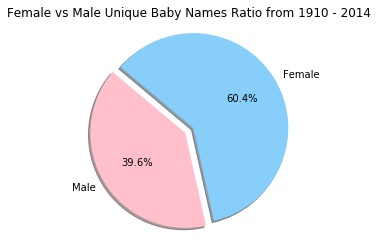

<Figure size 432x288 with 0 Axes>

In [15]:
# The names used by each gender (female has more diverse name selections/options than male)
name= baby_name_original.loc[:,['Name','Gender','Count']]
name

gendername= name.groupby(['Gender']).nunique()['Name']
gendername

Male= 13139
Female=20031

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [13139, 20031]

# The colors of each section of the pie chart
colors = ["pink","lightskyblue"]

explode = (0,0.1)

plt.pie(sizes, labels=labels,explode=explode, colors=colors, shadow=True, startangle=140,autopct="%1.1f%%")
plt.title(f"Female vs Male Unique Baby Names Ratio from 1910 - 2014")
plt.axis("equal")
plt.show()
# export as png

plt.savefig(f'Output/Female vs Male Unique Baby Names Ratio from 1910 - 2014.png')

### Proof! Female names have more variety than Male names

In [16]:
# Group the dataset by name
names = baby_name_original.groupby("Name")

# Different names in the database
baby_name_original.Name.nunique()


30274

In [17]:
# Name with the most occurances
most_occurances = names.Count.sum().sort_values(ascending=False)
most_occurances

Name
James       4957166.0
John        4845414.0
Robert      4725713.0
Michael     4312975.0
William     3839236.0
              ...    
Makua             5.0
Makinlee          5.0
Makenlie          5.0
Makenlee          5.0
Zyshonne          5.0
Name: Count, Length: 30274, dtype: float64

In [18]:
# Least occurances
least_occurances = (names.Count.sum()== 5).sum()
least_occurances

4722

In [20]:
# Top 10 Males Name
baby_name_male = baby_name_original[baby_name_original["Gender"] == "M"]
baby_name_male = baby_name_male[["Name", "Count"]]
baby_name_male = baby_name_male.groupby("Name")
baby_name_male = baby_name_male.sum()
baby_name_male = baby_name_male.sort_values("Count", ascending=False)
baby_name_male.head(10)

Count
Name              
James    4938965.0
John     4829733.0
Robert   4710600.0
Michael  4295779.0
William  3829026.0
David    3554102.0
Richard  2529952.0
Joseph   2479602.0
Charles  2244617.0
Thomas   2216356.0

In [21]:
# Top 10 Female Names

baby_name_female = baby_name_original[baby_name_original["Gender"] == "F"]
baby_name_female= baby_name_female[["Name", "Count"]]
baby_name_female = baby_name_female.groupby("Name")
baby_name_female = baby_name_female.sum()
baby_name_female = baby_name_female.sort_values("Count", ascending=False)
baby_name_female.head(10)

Count
Name                
Mary       3730856.0
Patricia   1567779.0
Elizabeth  1500462.0
Jennifer   1461813.0
Linda      1446300.0
Barbara    1422972.0
Margaret   1121985.0
Susan      1108255.0
Dorothy    1051603.0
Jessica    1038060.0

### Observation: counts of top Female names are lower than top Male names, reinforcing lower variety in Male names

In [22]:
# For creating tuples
males = [(male,'M') for male in list(baby_name_male.head(8).index)]
females = [(female,'F') for female in list(baby_name_female.head(8).index)]

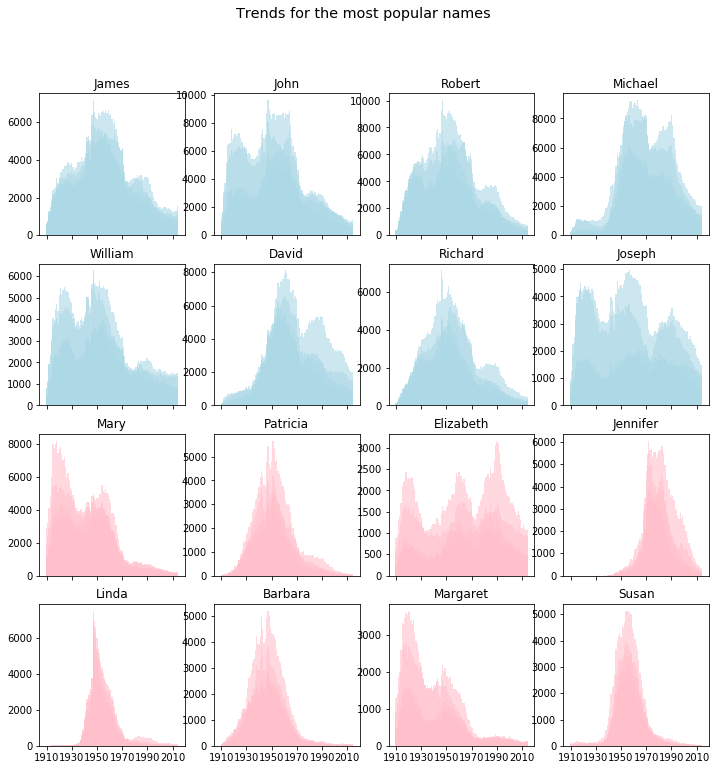

In [23]:
most_popular = baby_name_original

def plot(ax, name, gender):
    data = most_popular.loc[(most_popular.Name==name)&(most_popular.Gender==gender)]
    ax.bar(data.Year, data.Count, width = 1, alpha=0.6,
           color = 'pink' if gender=='F' else 'lightblue')
    ax.set_title(name)
    return ax

fig, ax = plt.subplots(4,4, figsize=(12,12), sharex=True)
ax = ax.flatten()
years = list(range(1910, 2021,20))
plt.xticks(years)
for a, (name, gender) in zip(ax, males+females):
    plot(a, name, gender)
fig.suptitle('Trends for the most popular names',fontsize='x-large');
plt.savefig("Output/Popular_Names.png")

### Observation: most Boys names peak around 1960; Joseph and Michael remain popular. Most Girls names also peak in 1950 or 1960, Elizabeth and Jennifer remain popular

In [24]:
baby_name_original["Name Length"]= baby_name_original["Name"].str.len()
baby_name_original

Id      Name  Year Gender State  Count  Name Length
0              1      Mary  1910      F    AK   14.0            4
1              2     Annie  1910      F    AK   12.0            5
2              3      Anna  1910      F    AK   10.0            4
3              4  Margaret  1910      F    AK    8.0            8
4              5     Helen  1910      F    AK    7.0            5
...          ...       ...   ...    ...   ...    ...          ...
5647421  5647422      Seth  2014      M    WY    5.0            4
5647422  5647423   Spencer  2014      M    WY    5.0            7
5647423  5647424      Tyce  2014      M    WY    5.0            4
5647424  5647425    Victor  2014      M    WY    5.0            6
5647425  5647426    Waylon  2014      M    WY    5.0            6

[5647426 rows x 7 columns]

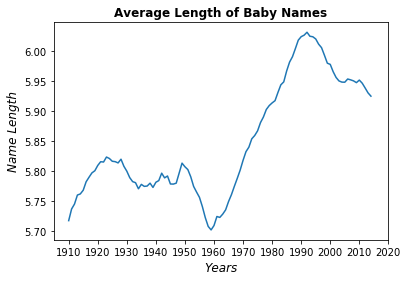

In [25]:
plt.plot(baby_name_original.groupby(['Year']).agg({'Name Length':np.mean}))
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length", fontsize=12,style='italic')
plt.title("Average Length of Baby Names",fontsize=12,fontweight='bold',style='normal')
plt.savefig("Output/NameLength.png")
plt.show()

### Observation: Baby name length increases from 1960 thru 1990

In [26]:
both_df = baby_name_original.groupby(['Year','Gender'])['Name Length'].mean()
both_df = both_df.unstack()

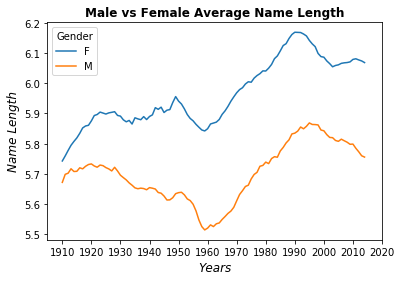

In [27]:
both_df.plot(kind = 'line')
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length",fontsize=12,style='italic')
plt.title("Male vs Female Average Name Length",fontsize=12,fontweight='bold',style='normal')
#plt.savefig("../Output/Male vs Female Name Length.png")
plt.savefig("Output/Male vs Female Name Length.png")
plt.show()

### Observation: Looking at the pattern, average female  names length are longer than males names length with a peak at 1990.

In [28]:
# Most popular Names Length
popular_name_length = baby_name_original.groupby(['Name','Name Length']).size().reset_index(name="Count").sort_values(by="Count",ascending=False).drop_duplicates("Name", keep="first")
print("The most popular Name Lengths:")
popular_name_length.head(20)

The most popular Name Lengths:


Name  Name Length  Count
17369   Leslie            6   7194
17160      Lee            3   7125
12442    James            5   7037
13761     John            4   6865
23582   Robert            6   6820
13485   Jessie            6   6636
29049  William            7   6522
19955  Michael            7   6396
19273     Mary            4   6371
5174   Charles            7   6268
6800     David            5   6147
13982   Joseph            6   5978
10117   George            6   5925
23450  Richard            7   5894
27463   Thomas            6   5832
27348    Terry            5   5828
6528    Daniel            6   5704
12459    Jamie            5   5690
15345    Kelly            5   5659
13437    Jerry            5   5644

In [29]:
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

Name  Year Gender State  Count  Name Length  Decade
Id                                                              
1            Mary  1910      F    AK   14.0            4    1910
2           Annie  1910      F    AK   12.0            5    1910
3            Anna  1910      F    AK   10.0            4    1910
4        Margaret  1910      F    AK    8.0            8    1910
5           Helen  1910      F    AK    7.0            5    1910
...           ...   ...    ...   ...    ...          ...     ...
5647422      Seth  2014      M    WY    5.0            4    2010
5647423   Spencer  2014      M    WY    5.0            7    2010
5647424      Tyce  2014      M    WY    5.0            4    2010
5647425    Victor  2014      M    WY    5.0            6    2010
5647426    Waylon  2014      M    WY    5.0            6    2010

[5647426 rows x 7 columns]

In [30]:
# Group the dataset by decade
decade = baby_name_new.groupby("Decade")

In [31]:
# Average per Decade 
average_decade = decade['Name Length'].mean()
print("The Average per decade is:")
average_decade

The Average per decade is:


Decade
1910    5.771876
1920    5.815646
1930    5.780017
1940    5.788889
1950    5.754392
1960    5.748616
1970    5.865854
1980    5.963152
1990    6.014065
2000    5.954859
2010    5.938594
Name: Name Length, dtype: float64

In [32]:
# Standard deviation of decade
std_decade= decade['Name Length'].std()
print("The Standard Deviation of decade on Name length is:")
std_decade

The Standard Deviation of decade on Name length is:


Decade
1910    1.471722
1920    1.470501
1930    1.462167
1940    1.465226
1950    1.452642
1960    1.439538
1970    1.419871
1980    1.420725
1990    1.397427
2000    1.364146
2010    1.368459
Name: Name Length, dtype: float64

In [33]:
# The average Name Length for 100 years
gender_name_length = baby_name_original["Name Length"]
average_name = np.average(gender_name_length)
print(" The average name length is:" + str(average_name))

 The average name length is:5.875933389831049


In [34]:
mean_series = baby_name_new.groupby(['Year'])['Name Length'].mean()
max_index = mean_series.argmax()
print("Maximum average value is %f"%mean_series.iloc[max_index])

# Year with maximum average length
print("Year with maximum length is %d"%mean_series.index[max_index])

#Top ten values in 1990
baby_name_new[baby_name_new['Year'] == 1990]

Maximum average value is 6.031970
Year with maximum length is 1992


Name  Year Gender State  Count  Name Length  Decade
Id                                                              
8496      Jessica  1990      F    AK  112.0            7    1990
8497       Ashley  1990      F    AK   96.0            6    1990
8498       Amanda  1990      F    AK   92.0            6    1990
8499     Brittany  1990      F    AK   75.0            8    1990
8500     Samantha  1990      F    AK   72.0            8    1990
...           ...   ...    ...   ...    ...          ...     ...
5643677     Kaleb  1990      M    WY    5.0            5    1990
5643678     Kasey  1990      M    WY    5.0            5    1990
5643679     Keith  1990      M    WY    5.0            5    1990
5643680    Mathew  1990      M    WY    5.0            6    1990
5643681     Trent  1990      M    WY    5.0            5    1990

[69141 rows x 7 columns]

In [35]:
print("The Longest Name Length for year 1990 :")
baby_name_new[baby_name_new['Year'] == 1990].sort_values('Name Length',ascending = False).head(10)[['Name','Name Length']]



The Longest Name Length for year 1990 :


Name  Name Length
Id                                  
470123   Mariadelcarmen           14
644729   Michaelanthony           14
644768   Antoniodejesus           14
470124   Mariaguadalupe           14
5024084   Michaelangelo           13
472164    Maryelizabeth           13
3822039   Michaelangelo           13
472149    Mariacristina           13
1701829   Michaelangelo           13
644235    Michaelangelo           13

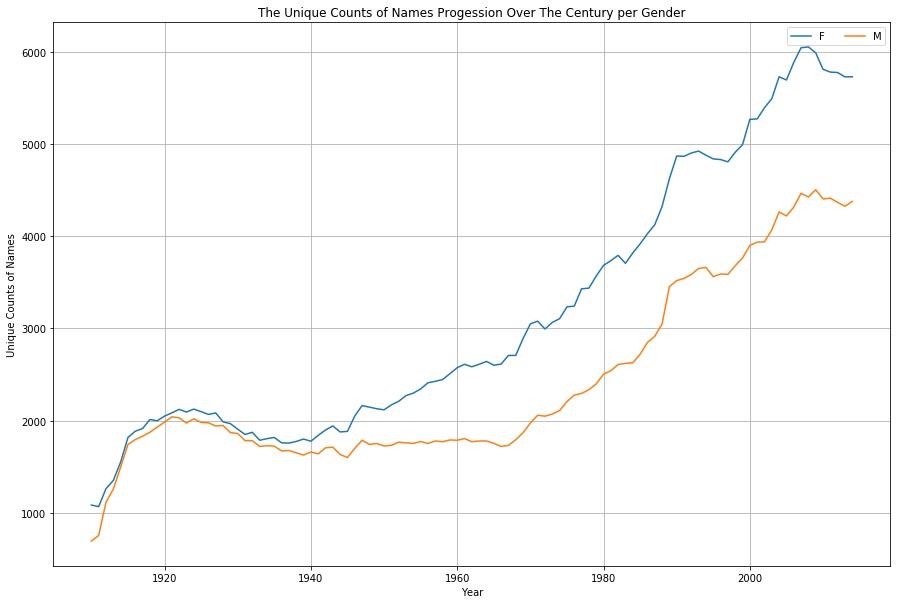

In [36]:
#The progression of numbers of unique names in each year


year= baby_name_original.loc[:,['Name','Year','Gender']]
year

# getting female list of unique name by each year

genderf= year.loc[year['Gender'] == 'F']
genderf

genderfemale= genderf.groupby(['Year','Gender']).nunique()['Name']


genderfemale= pd.DataFrame(genderfemale)
genderfemale

#getting male list of unique name by each year

genderm= year.loc[year['Gender'] == 'M']
genderm

gendermale= genderm.groupby(['Year','Gender']).nunique()['Name']

gendermale= pd.DataFrame(gendermale)
gendermale


final=pd.merge(genderfemale, gendermale, how='outer', on=['Year','Gender','Name'])
final

final.rename(index={0: "Year", 1: "Gender", 2: "Name"})
df = final.unstack()
df.columns =df.columns.droplevel()
df

multi_plot = df.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("The Unique Counts of Names Progession Over The Century per Gender")
multi_plot.set_xlabel("Year")

multi_plot.set_ylabel("Unique Counts of Names")
multi_plot.legend(ncol=2)


years = list(range(1910, 2021, 10))

#plt.set_xticks(years)
plt.grid()


plt.savefig(f'Output/The Unique Counts of Names Progession Over The Century per Gender.png')

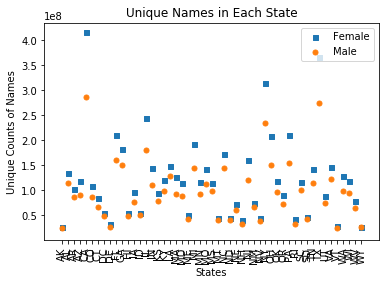

<Figure size 432x288 with 0 Axes>

In [37]:
# The progression of numbers of unique names by state in gender

region= baby_name_original.loc[:,['Name','Year','Gender','State']]
region



f= region.loc[region['Gender'] == 'F']
f

m= region.loc[region['Gender'] == 'M']
m


fgender= f.groupby(['State']).sum()
fgender = pd.DataFrame(fgender)
fgender

mgender=m.groupby(['State']).sum()
mgender= pd.DataFrame(mgender)
mgender

data=pd.merge(fgender, mgender, how='left', on=['State'], suffixes=('_F', '_M'))
data

f= data['Year_F']
m =data['Year_M']


x = data.index
y1 = f
y2= m
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=25, marker="s", label='Female')
ax1.scatter(x, y2, s=25, marker="o", label='Male')


plt.title("Unique Names in Each State")
plt.xlabel("States")
plt.ylabel("Unique Counts of Names")
plt.xticks(rotation=90)

plt.legend(loc='upper right');
plt.show()
plt.savefig(f'Output/The Counts of Unique Name In Different States per Gender.png')

### Observation: states CA and NY have the highest number of unique names across all states

Overall, there is an increase in “new” baby names overall, and particularly from 1970 onward.

One reason for this is U.S. population growth in general (Baby Boomers… now millennials). There are more names, therefore, more opportunities for newness.

Another explanation for more “new” names is cultural: the data suggest that modern parents are less likely than their predecessors to name their child after a family (“junior”). These new parents value individualism more than tradition.

There is a correlation between the volume of new names and increased immigration during peacetime. 
